<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling

In [1]:
import pandas as pd

In [21]:

df = pd.read_csv('credit_cards_dataset.csv')

In [22]:
from sklearn.decomposition import PCA

In [23]:
df_Pay_Score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_Bill_Amount = df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df_Pay_Amount = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_Pay_Score.head(3)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0


In [24]:
trans = PCA(n_components=1)
X_Pay_Score = df_Pay_Score.values
X_Bill_Amount = df_Bill_Amount.values
X_Pay_Amount = df_Pay_Amount.values

In [25]:

# transform the data
X_dim = trans.fit_transform(X_Pay_Score)
df_X_dim_Pay_Score = pd.DataFrame(X_dim, columns=['Pay_AVR'])

# transform the data
X_dim = trans.fit_transform(X_Bill_Amount)
df_X_dim_Bill_Amount = pd.DataFrame(X_dim, columns=['Bill_AVR'])

# transform the data
X_dim = trans.fit_transform(X_Pay_Amount)
df_X_dim_Pay_Amount = pd.DataFrame(X_dim, columns=['P_AMT_AVR'])

In [26]:
df = pd.concat([df, df_X_dim_Pay_Score, df_X_dim_Bill_Amount, df_X_dim_Pay_Amount], axis=1)

In [29]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Pay_AVR', 'Bill_AVR', 'P_AMT_AVR'],
      dtype='object')

In [49]:
X = df.drop(['ID','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month'], axis =1).values
y = df['default.payment.next.month'].values

In [45]:
# X = df.drop(df.iloc[:,6:25], axis =1).values
# y = df['default.payment.next.month'].values

In [50]:
## 랜덤포레스트 알고리즘
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


test_size = 0.3
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# model = RandomForestClassifier(n_estimators=150, criterion = 'entropy', max_features='auto')
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print(f"Accuracy: {result*100}")

Accuracy: 72.05555555555556


In [51]:
## 리콜값 검증 (recall) -> 거의 맞지 않음, 새로운 알고리즘 가져오기
from sklearn.metrics import recall_score

y_predict = model.predict(X_test)

print("Recall score:"+ str(recall_score(Y_test, y_predict)))

Recall score:0.3989795918367347


Confusion matrix, without normalization
[[6578  462]
 [1297  663]]


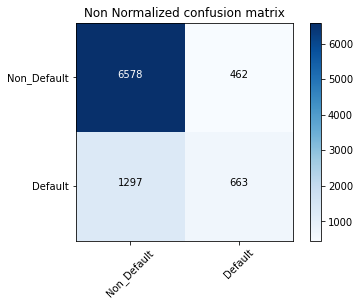

In [12]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
cnf_matrix = confusion_matrix(Y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [52]:
import sklearn.metrics as metrics

print('accuracy', metrics.accuracy_score(Y_test, y_predict) )

print('precision', metrics.precision_score(Y_test, y_predict) )

print('recall', metrics.recall_score(Y_test, y_predict) )

print('f1', metrics.f1_score(Y_test, y_predict) )

print(metrics.classification_report(Y_test, y_predict))

print(metrics.confusion_matrix(Y_test, y_predict))

accuracy 0.7205555555555555
precision 0.36904200094384143
recall 0.3989795918367347
f1 0.3834273106153469
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.37      0.40      0.38      1960

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000

[[5703 1337]
 [1178  782]]
